In [1]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Preparing Dataset
dataset = fetch_lfw_people(min_faces_per_person=100, resize=0.5)
X = dataset.data
y = dataset.target
target_names = dataset.target_names
images = dataset.images

In [3]:
X.shape

(1140, 2914)

In [4]:
n, h, w = images.shape
print(len(target_names))
np.unique(y, return_counts = True)

5


(array([0, 1, 2, 3, 4], dtype=int64),
 array([236, 121, 530, 109, 144], dtype=int64))

In [5]:
print(n)
print(h)
print(w)

1140
62
47


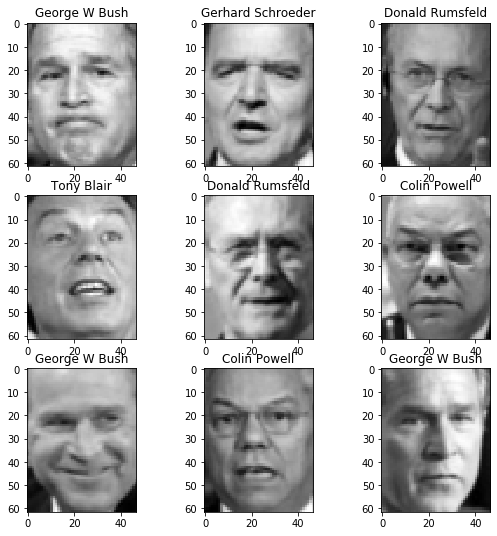

In [6]:
# Plot the images
def plot_img(images, titles, h, w, rows=3, cols=3):
    plt.figure(figsize=(3*cols, 3*rows))
    for i in range(rows*cols):
        plt.subplot(rows, cols, i+1)
        plt.imshow(images[i].reshape(h,w), cmap="gray")
        plt.title(target_names[titles[i]])
plot_img(X, y, h, w)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [8]:
X_train.shape

(1026, 2914)

In [9]:
pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [10]:
pca.transform(X_train).shape

(1026, 1026)

In [11]:
var = pca.explained_variance_
print(var)
comp = pca.components_
print(comp.shape)

[7.3633869e+05 6.3650162e+05 3.0940647e+05 ... 3.2197502e+00 2.9875937e+00
 6.8564386e-06]
(1026, 2914)


In [12]:
val_sum = np.sum(var)
print(val_sum)
sort_indx = np.argsort(var)
sort_indx = sort_indx[::-1]
print(sort_indx)

4145777.8
[   0    1    2 ... 1023 1024 1025]


In [13]:
temp_sum = 0
principal_vec = []
principal_val = []
i = 0
while (temp_sum < 0.98*val_sum):
    principal_vec.append(comp[sort_indx[i], :])
    principal_val.append(var[sort_indx[i]])
    temp_sum += var[sort_indx[i]]
    i += 1
print("Number of components : {}".format(i))

Number of components : 272


In [14]:
principal_vec = np.matrix(principal_vec)
print(principal_vec.shape)

(272, 2914)


In [15]:
X_train_transf = np.dot(X_train, principal_vec.T)
X_test_transf = np.dot(X_test, principal_vec.T)

In [16]:
X_train_transf.shape

(1026, 272)

In [17]:
clf = MLPClassifier(hidden_layer_sizes = (1024, ), batch_size = 128, verbose = True, early_stopping = True)
clf.fit(X_train_transf, y_train)

Iteration 1, loss = inf
Validation score: 0.543689
Iteration 2, loss = inf
Validation score: 0.514563
Iteration 3, loss = 56.89804045
Validation score: 0.689320
Iteration 4, loss = 19.15569836
Validation score: 0.786408
Iteration 5, loss = 11.50287817
Validation score: 0.805825
Iteration 6, loss = 4.97681593
Validation score: 0.776699
Iteration 7, loss = 3.38226608
Validation score: 0.873786
Iteration 8, loss = 2.15541016
Validation score: 0.883495
Iteration 9, loss = 0.59051996
Validation score: 0.844660
Iteration 10, loss = 0.19031752
Validation score: 0.883495
Iteration 11, loss = 0.07437655
Validation score: 0.883495
Iteration 12, loss = 0.04975753
Validation score: 0.883495
Iteration 13, loss = 0.00043571
Validation score: 0.883495
Iteration 14, loss = 0.00074897
Validation score: 0.873786
Iteration 15, loss = 0.00016122
Validation score: 0.873786
Iteration 16, loss = 0.00016903
Validation score: 0.864078
Iteration 17, loss = 0.00018451
Validation score: 0.864078
Iteration 18, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size=128, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(1024,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [18]:
y_pred = clf.predict(X_test_transf)
print(classification_report(y_test, y_pred, target_names = target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.75      0.86      0.80        21
  Donald Rumsfeld       0.75      0.75      0.75        12
    George W Bush       0.88      0.87      0.88        61
Gerhard Schroeder       0.71      0.83      0.77         6
       Tony Blair       0.91      0.71      0.80        14

         accuracy                           0.83       114
        macro avg       0.80      0.80      0.80       114
     weighted avg       0.84      0.83      0.83       114



In [20]:
# Plot the images after applying pca
def plot_img(images, titles, h, w, rows=3, cols=3):
    plt.figure(figsize=(4*cols, 4*rows))
    for i in range(rows*cols):
        plt.subplot(rows, cols, i+1)
        plt.imshow(images[i].reshape(h,w), cmap="gray")
        plt.title([titles[i]])
n_components = 272
mean_imgs = []
for i in range(n_components):
    vec = principal_vec[i,:]
    img = vec.reshape((h, w))
    mean_imgs.append(img)
mean_imgs = np.array(mean_imgs)
print(mean_imgs.shape)

(272, 62, 47)


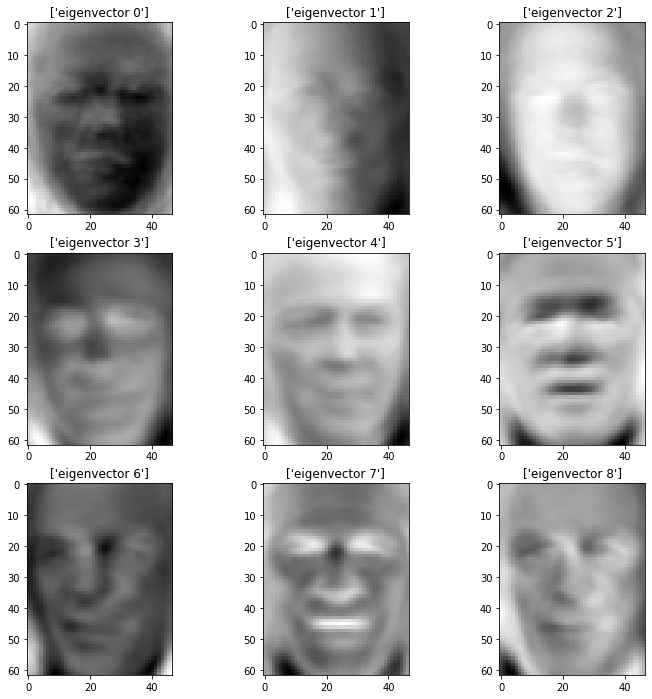

In [21]:
pca_titles = [f"eigenvector {i}" for i in range(n_components)]
plot_img(mean_imgs, pca_titles, h, w)